In [1]:
from sklearn.decomposition import PCA
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# ^^^ pyforest auto-imports - don't write above this line
df=pd.read_csv("files/extruder1407_cleaned_resample20s.csv")

In [2]:
df.set_index('utctimestamp', inplace=True)
df.index = pd.to_datetime(df.index, unit='ns')

## Applico il bisecting k-means con l'obiettivo di ottenere 5 cluster

In [3]:
import bkmeans #modulo presente in locale

In [4]:
clustered_df=bkmeans.bkmeans(df,5)

Iterazione 0
Aggiungo il cluster con id 0 avente inerzia pari a 122925.13667765226
Il cluster con id 1 avente inerzia pari a 150885.46078385517 sarà sottoposto a 2-means
Iterazione 1
Aggiungo il cluster con id 2 avente inerzia pari a 20460.31033400817
Aggiungo il cluster con id 3 avente inerzia pari a 53845.2294481344
Elimino il cluster con id 0 in posizione 0 nella lista, sarà sottoposto a 2-means
Iterazione 2
Aggiungo il cluster con id 4 avente inerzia pari a 26468.020681331993
Aggiungo il cluster con id 5 avente inerzia pari a 43250.11619734006
Elimino il cluster con id 3 in posizione 1 nella lista, sarà sottoposto a 2-means
Iterazione 3
Ultima iterazione, quindi aggiungo i cluster con id 6 e 7 alla lista e riformo il dataset


In [5]:
clustered_df.sort_index(inplace=True)

In [8]:
clustered_df['cluster'].unique()

array([4, 6, 7, 5, 2], dtype=int64)

In [6]:
np.savetxt("files/extruder_bkmeans_clusters.csv", clustered_df['cluster'].values, delimiter=",")

## Ottengo 3 componenti principali utili a plottare in 2D e 3D

In [18]:
pca = PCA(n_components=3)
X_reduce = pca.fit_transform(df)

In [19]:
clustered_df['pc1']=X_reduce[:, 0]
clustered_df['pc2']=X_reduce[:, 1]
clustered_df['pc3']=X_reduce[:, 2]

## Visualizzo in 3D e 2D i cluster sulle componenti principali

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

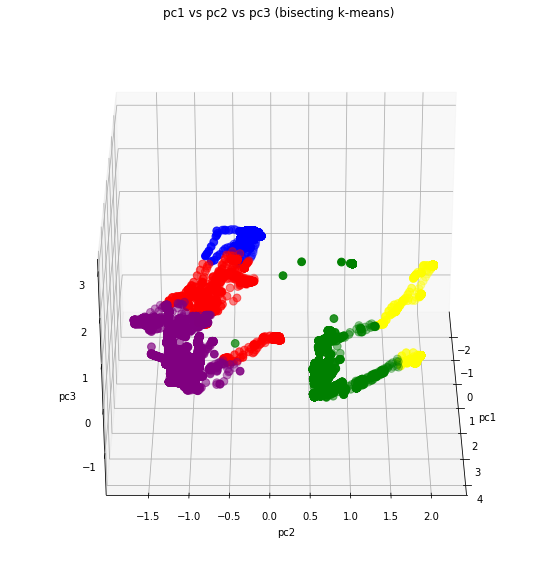

In [38]:
#3D Plot as we did the clustering on the basis of 3 input features
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(clustered_df["pc1"][clustered_df.cluster == 4], clustered_df["pc2"][clustered_df.cluster == 4], clustered_df["pc3"][clustered_df.cluster == 4], c='purple', s=60)
ax.scatter(clustered_df["pc1"][clustered_df.cluster == 6], clustered_df["pc2"][clustered_df.cluster == 6], clustered_df["pc3"][clustered_df.cluster == 6], c='red', s=60)
ax.scatter(clustered_df["pc1"][clustered_df.cluster == 7], clustered_df["pc2"][clustered_df.cluster == 7], clustered_df["pc3"][clustered_df.cluster == 7], c='blue', s=60)
ax.scatter(clustered_df["pc1"][clustered_df.cluster == 5], clustered_df["pc2"][clustered_df.cluster == 5], clustered_df["pc3"][clustered_df.cluster == 5], c='green', s=60)
ax.scatter(clustered_df["pc1"][clustered_df.cluster == 2], clustered_df["pc2"][clustered_df.cluster == 2], clustered_df["pc3"][clustered_df.cluster == 2], c='yellow', s=60)
ax.view_init(30, 0)
plt.xlabel("pc1")
plt.ylabel("pc2")
ax.set_zlabel('pc3')
plt.title('pc1 vs pc2 vs pc3 (bisecting k-means)')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

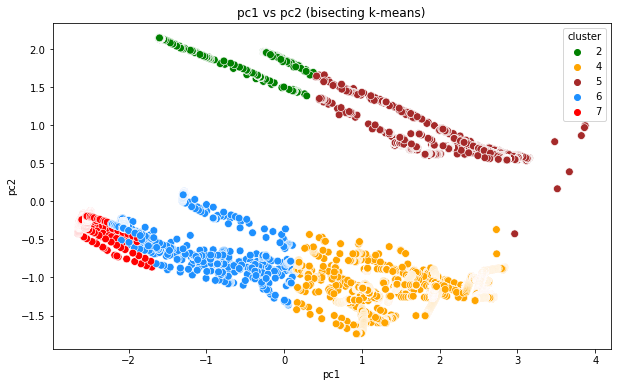

In [39]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'pc1',y = 'pc2',hue="cluster",  
                 palette=['green','orange','brown','dodgerblue','red'], legend='full',data = clustered_df  ,s = 60 )
plt.xlabel('pc1')
plt.ylabel('pc2') 
plt.title('pc1 vs pc2 (bisecting k-means)')
plt.show()

In [7]:
cluster_ticc=pd.read_csv('files/Results_w1_resample20s_extruder.txt', header = None)
cluster_ticc[0].values

array([2, 2, 2, ..., 4, 4, 4], dtype=int64)

In [10]:
cluster_ticc[0].unique()

array([2, 0, 3, 1, 4], dtype=int64)

In [8]:
clustered_df['cluster_ticc']=cluster_ticc[0].values

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

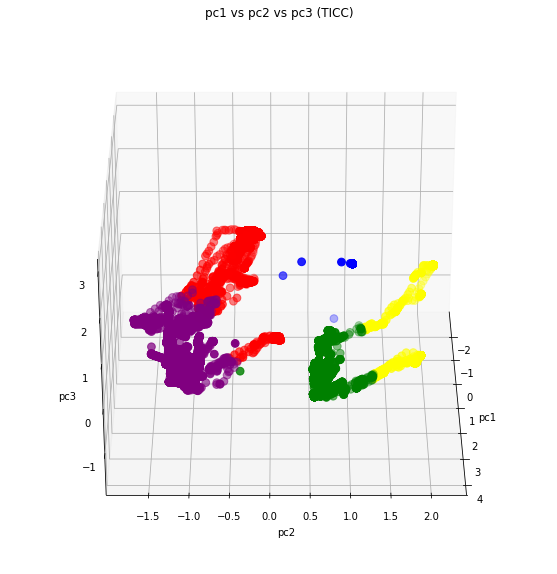

In [40]:
#3D Plot as we did the clustering on the basis of 3 input features
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(clustered_df["pc1"][clustered_df.cluster_ticc == 2], clustered_df["pc2"][clustered_df.cluster_ticc == 2], clustered_df["pc3"][clustered_df.cluster_ticc == 2], c='purple', s=60)
ax.scatter(clustered_df["pc1"][clustered_df.cluster_ticc == 0], clustered_df["pc2"][clustered_df.cluster_ticc == 0], clustered_df["pc3"][clustered_df.cluster_ticc == 0], c='red', s=60)
ax.scatter(clustered_df["pc1"][clustered_df.cluster_ticc == 3], clustered_df["pc2"][clustered_df.cluster_ticc == 3], clustered_df["pc3"][clustered_df.cluster_ticc == 3], c='blue', s=60)
ax.scatter(clustered_df["pc1"][clustered_df.cluster_ticc == 1], clustered_df["pc2"][clustered_df.cluster_ticc == 1], clustered_df["pc3"][clustered_df.cluster_ticc == 1], c='green', s=60)
ax.scatter(clustered_df["pc1"][clustered_df.cluster_ticc == 4], clustered_df["pc2"][clustered_df.cluster_ticc == 4], clustered_df["pc3"][clustered_df.cluster_ticc == 4], c='yellow', s=60)
ax.view_init(30, 0)
plt.xlabel("pc1")
plt.ylabel("pc2")
ax.set_zlabel('pc3')
plt.title('pc1 vs pc2 vs pc3 (TICC)')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

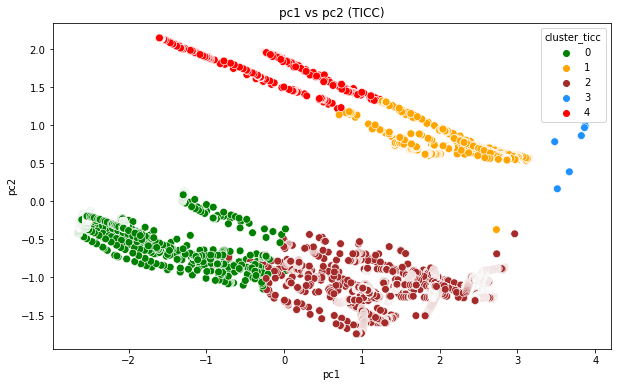

In [41]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'pc1',y = 'pc2',hue="cluster_ticc",  
                 palette=['green','orange','brown','dodgerblue','red'], legend='full',data = clustered_df  ,s = 60 )
plt.xlabel('pc1')
plt.ylabel('pc2') 
plt.title('pc1 vs pc2 (TICC)')
plt.show()

### Rispetto al bisecting k-means, il TICC raggruppa i punti lontani dagli altri in un cluster specifico. Da preferire?

## Tentativo DBSCAN che genera però troppi cluster, da testare con diversi parametri

In [ ]:
from sklearn.neighbors import NearestNeighbors
nearest_neighbors = NearestNeighbors(n_neighbors=199)
neighbors = nearest_neighbors.fit(df.values)
distances, indices = neighbors.kneighbors(df.values)
distances = np.sort(distances[:,198], axis=0)

0.06322997100661085


<Figure size 360x360 with 0 Axes>

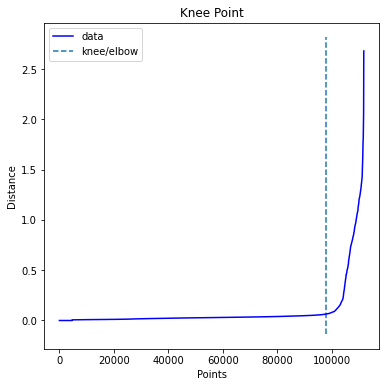

In [13]:
from kneed import KneeLocator
i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')
fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")

print(distances[knee.knee])

In [ ]:
"""from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps = 1, min_samples = 198, n_jobs=-1)
clusters_db = dbscan.fit_predict(df.values)
clustered_df['cluster_db']=clusters_db
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'pc1',y = 'pc2',hue="cluster_db", palette="deep",
                 legend='full',data = clustered_df  ,s = 60 )
plt.xlabel('pc1')
plt.ylabel('pc2') 
plt.title('pc1 vs pc2 (DBScan)')
plt.show()"""

## Aggiungo al dataframe le colonne degli outlier ottenuti tramite LOF, PCA_AD, COPOD e autoencoder, salvati in csv da un precedente notebook 

In [12]:
clustered_df['lof']=pd.read_csv('files/lof_extruder.csv', header = None)[0].values

In [13]:
clustered_df['pcaAD']=pd.read_csv('files/pcaAD_outlier_extruder.csv', header = None)[0].values

In [14]:
clustered_df['copod']=pd.read_csv('files/copod_outlier_extruder.csv', header = None)[0].values

In [15]:
clustered_df['autoencoder']=pd.read_csv('files/autoencoder_outlier_extruder.csv', header = None)[0].values

In [16]:
clustered_df= clustered_df.astype({"lof": int, "pcaAD": int, "copod":int, "autoencoder": int})

### Anche in questo caso plotto graficamente gli outlier sia in 2D che in 3D (0 = inlier, 1 = outlier)

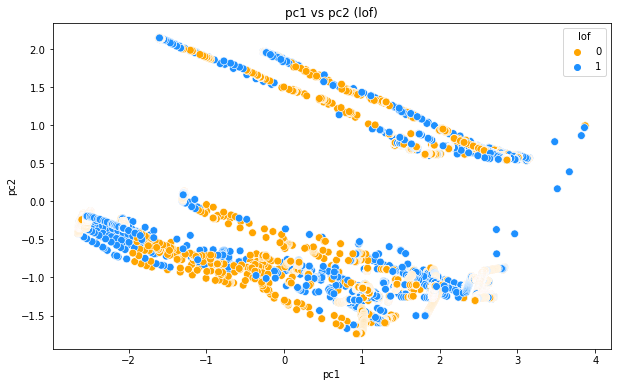

In [20]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'pc1',y = 'pc2',hue="lof",  
                 palette=['orange','dodgerblue'], legend='full',data = clustered_df  ,s = 60 )
plt.xlabel('pc1')
plt.ylabel('pc2') 
plt.title('pc1 vs pc2 (lof)')
plt.show()

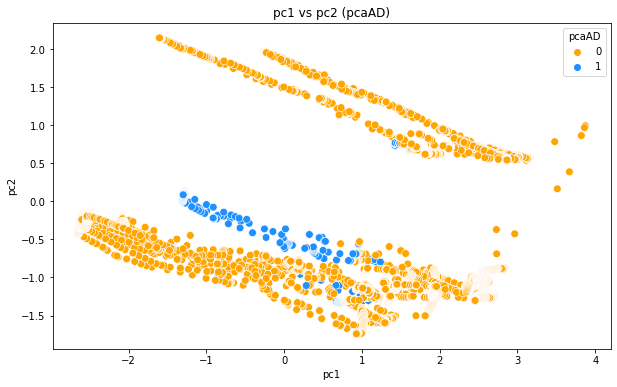

In [23]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'pc1',y = 'pc2',hue="pcaAD",  
                 palette=['orange','dodgerblue'], legend='full',data = clustered_df  ,s = 60 )
plt.xlabel('pc1')
plt.ylabel('pc2') 
plt.title('pc1 vs pc2 (pcaAD)')
plt.show()

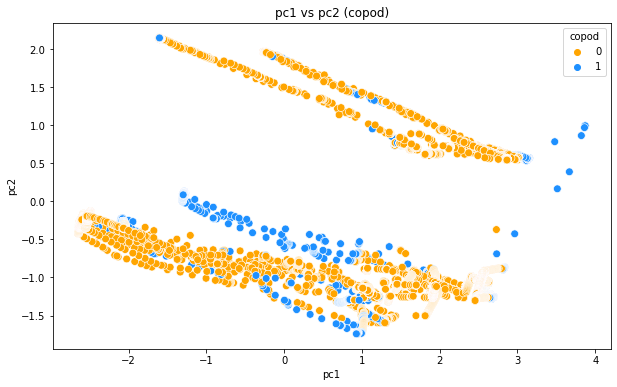

In [47]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'pc1',y = 'pc2',hue="copod",  
                 palette=['orange','dodgerblue'], legend='full',data = clustered_df  ,s = 60 )
plt.xlabel('pc1')
plt.ylabel('pc2') 
plt.title('pc1 vs pc2 (copod)')
plt.show()

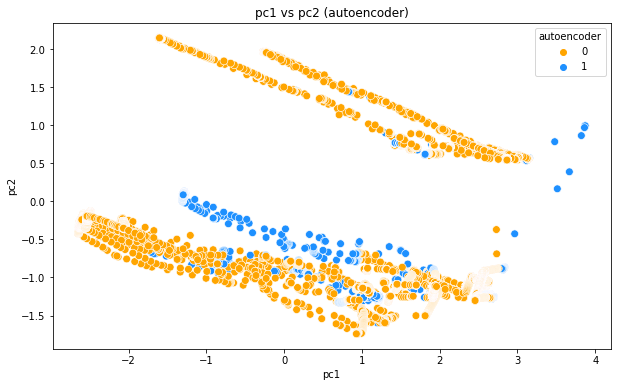

In [20]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'pc1',y = 'pc2',hue="autoencoder",  
                 palette=['orange','dodgerblue'], legend='full',data = clustered_df  ,s = 60 )
plt.xlabel('pc1')
plt.ylabel('pc2') 
plt.title('pc1 vs pc2 (autoencoder)')
plt.show()

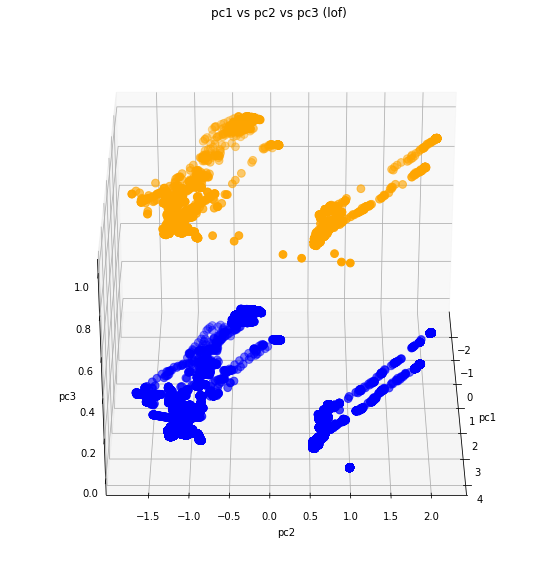

In [53]:
#3D Plot as we did the clustering on the basis of 3 input features
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(clustered_df["pc1"][clustered_df.lof == 0], clustered_df["pc2"][clustered_df.lof == 0], clustered_df["lof"][clustered_df.lof == 0], c='blue', s=60)
ax.scatter(clustered_df["pc1"][clustered_df.lof == 1], clustered_df["pc2"][clustered_df.lof == 1], clustered_df["lof"][clustered_df.lof == 1], c='orange', s=60)
ax.view_init(30, 0)
plt.xlabel("pc1")
plt.ylabel("pc2")
ax.set_zlabel('pc3')
plt.title('pc1 vs pc2 vs pc3 (lof)')
plt.show()

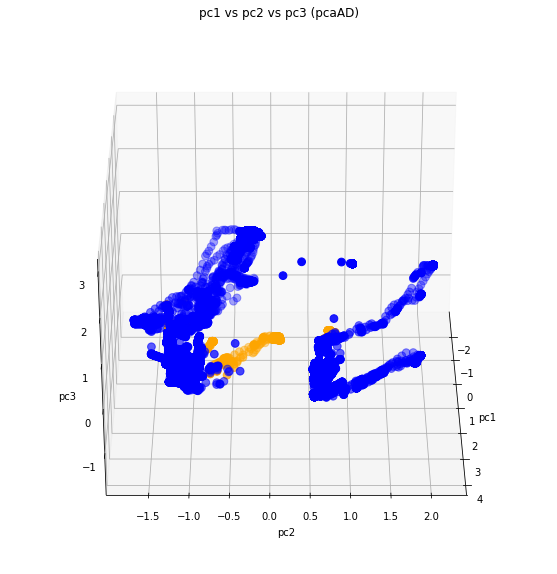

In [51]:
#3D Plot as we did the clustering on the basis of 3 input features
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(clustered_df["pc1"][clustered_df.pcaAD == 0], clustered_df["pc2"][clustered_df.pcaAD == 0], clustered_df["pc3"][clustered_df.pcaAD == 0], c='blue', s=60)
ax.scatter(clustered_df["pc1"][clustered_df.pcaAD == 1], clustered_df["pc2"][clustered_df.pcaAD == 1], clustered_df["pc3"][clustered_df.pcaAD == 1], c='orange', s=60)
ax.view_init(30, 0)
plt.xlabel("pc1")
plt.ylabel("pc2")
ax.set_zlabel('pc3')
plt.title('pc1 vs pc2 vs pc3 (pcaAD)')
plt.show()

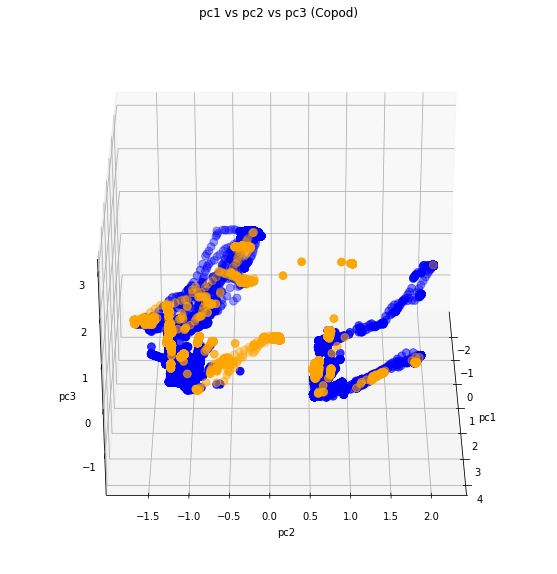

In [49]:
#3D Plot as we did the clustering on the basis of 3 input features
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(clustered_df["pc1"][clustered_df.copod == 0], clustered_df["pc2"][clustered_df.copod == 0], clustered_df["pc3"][clustered_df.copod == 0], c='blue', s=60)
ax.scatter(clustered_df["pc1"][clustered_df.copod == 1], clustered_df["pc2"][clustered_df.copod == 1], clustered_df["pc3"][clustered_df.copod == 1], c='orange', s=60)
ax.view_init(30, 0)
plt.xlabel("pc1")
plt.ylabel("pc2")
ax.set_zlabel('pc3')
plt.title('pc1 vs pc2 vs pc3 (Copod)')
plt.show()

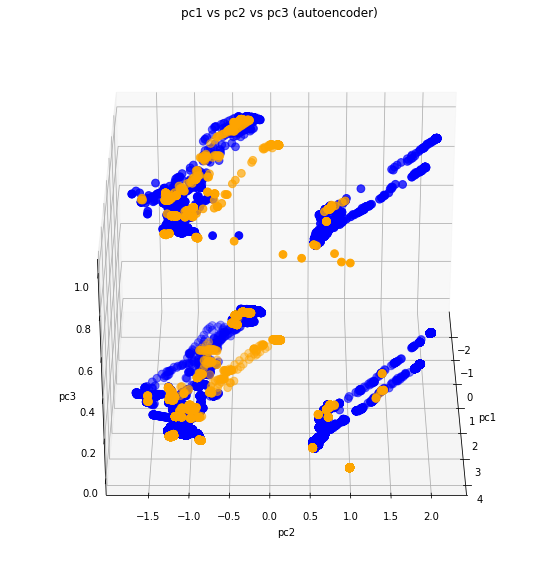

In [21]:
#3D Plot as we did the clustering on the basis of 3 input features
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(clustered_df["pc1"][clustered_df.autoencoder == 0], clustered_df["pc2"][clustered_df.autoencoder == 0], clustered_df["lof"][clustered_df.autoencoder == 0], c='blue', s=60)
ax.scatter(clustered_df["pc1"][clustered_df.autoencoder == 1], clustered_df["pc2"][clustered_df.autoencoder == 1], clustered_df["lof"][clustered_df.autoencoder == 1], c='orange', s=60)
ax.view_init(30, 0)
plt.xlabel("pc1")
plt.ylabel("pc2")
ax.set_zlabel('pc3')
plt.title('pc1 vs pc2 vs pc3 (autoencoder)')
plt.show()

### Plotto anche sulla linea temporale della PC1

In [23]:
attrib='pc1'

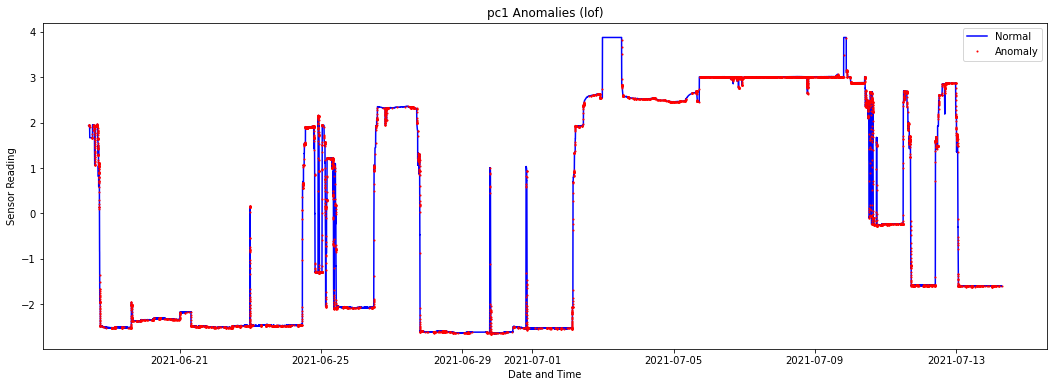

In [58]:
# visualization
_ = plt.figure(figsize=(18,6))
_ = plt.plot(clustered_df[attrib], color='blue', label='Normal')
_ = plt.plot(clustered_df[attrib][clustered_df['lof'] == 1], linestyle='none', marker='X', color='red', markersize=1, label='Anomaly')
_ = plt.xlabel('Date and Time')
_ = plt.ylabel('Sensor Reading')
_ = plt.title(attrib+' Anomalies (lof)')
_ = plt.legend(loc='best')
plt.show();

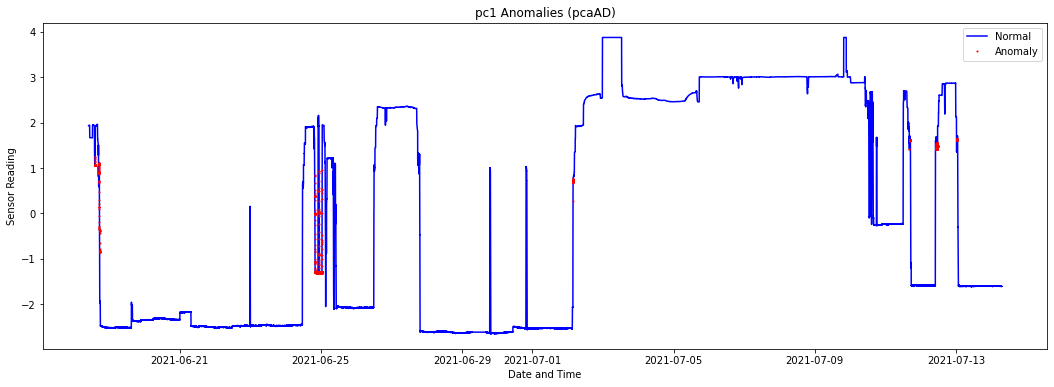

In [57]:
# visualization
_ = plt.figure(figsize=(18,6))
_ = plt.plot(clustered_df[attrib], color='blue', label='Normal')
_ = plt.plot(clustered_df[attrib][clustered_df['pcaAD'] == 1], linestyle='none', marker='X', color='red', markersize=1, label='Anomaly')
_ = plt.xlabel('Date and Time')
_ = plt.ylabel('Sensor Reading')
_ = plt.title(attrib+' Anomalies (pcaAD)')
_ = plt.legend(loc='best')
plt.show();

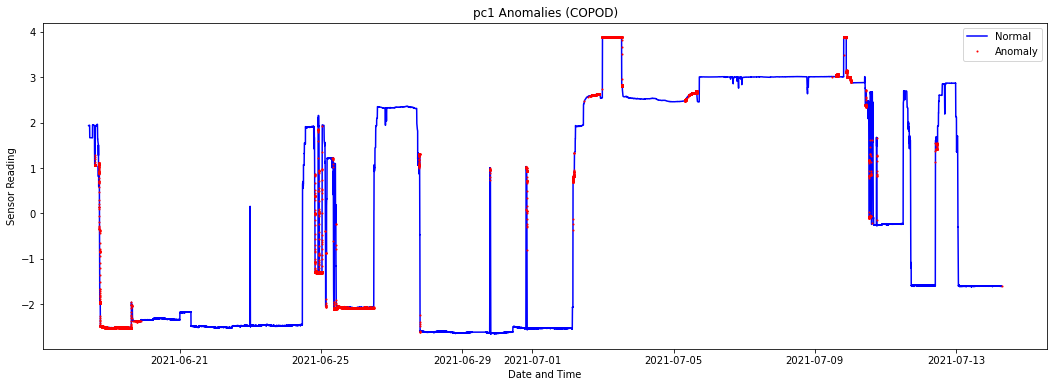

In [59]:
# visualization
_ = plt.figure(figsize=(18,6))
_ = plt.plot(clustered_df[attrib], color='blue', label='Normal')
_ = plt.plot(clustered_df[attrib][clustered_df['copod'] == 1], linestyle='none', marker='X', color='red', markersize=1, label='Anomaly')
_ = plt.xlabel('Date and Time')
_ = plt.ylabel('Sensor Reading')
_ = plt.title(attrib+' Anomalies (COPOD)')
_ = plt.legend(loc='best')
plt.show();

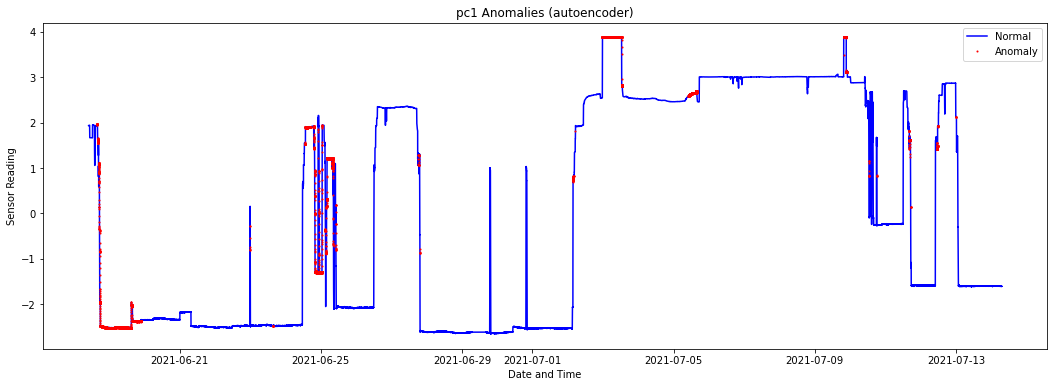

In [24]:
# visualization
_ = plt.figure(figsize=(18,6))
_ = plt.plot(clustered_df[attrib], color='blue', label='Normal')
_ = plt.plot(clustered_df[attrib][clustered_df['autoencoder'] == 1], linestyle='none', marker='X', color='red', markersize=1, label='Anomaly')
_ = plt.xlabel('Date and Time')
_ = plt.ylabel('Sensor Reading')
_ = plt.title(attrib+' Anomalies (autoencoder)')
_ = plt.legend(loc='best')
plt.show();

### Graficamente, il COPOD sembra il metodo che riesce a separare meglio gli outlier. Ha risultati quasi sovrapponibili all'autoencoder.
### Il LOF (Local Outlier Factor) determina un numero eccessivo di outlier quindi è un metodo che non si addice a questo tipo di dataset